<a href="https://colab.research.google.com/github/muhakbarhamid21/digit-recognition/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
# Load training and testing datasets
train_df = pd.read_csv('emnist/emnist-digits-train.csv')
test_df = pd.read_csv('emnist/emnist-digits-test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'emnist/emnist-digits-train.csv'

# Reducing Data per Class

In [4]:
def reduce_data_by_class(df, n=1000):
    return df.groupby(df.columns[0]).apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)

reduced_train_df = reduce_data_by_class(train_df, n=1000)
reduced_test_df = reduce_data_by_class(test_df, n=1000)

<ipython-input-4-8aae123e7f07>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(df.columns[0]).apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)
<ipython-input-4-8aae123e7f07>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(df.columns[0]).apply(lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)


# Setting Up Features and Labels

In [5]:
y_train = reduced_train_df.iloc[:, 0].values
X_train = reduced_train_df.iloc[:, 1:].values

y_test = reduced_test_df.iloc[:, 0].values
X_test = reduced_test_df.iloc[:, 1:].values

# Preprocessing Data

In [6]:
# Reshape data: Assuming a 28x28 pixel image (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

In [7]:
# Normalize pixel values ​​to the range [0, 1]
X_train /= 255.0
X_test /= 255.0

In [8]:
# One-hot encoding for labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Splitting Data into Training and Validation

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Data Exploration

In [ ]:
unique, counts = np.unique(reduced_train_df.iloc[:, 0], return_counts=True)

print("Label distribution in training data:")

for label, count in zip(unique, counts):
    print(f"Label {label}: {count} data")

Label distribution in training data:
Label 0: 1000 data
Label 1: 1000 data
Label 2: 1000 data
Label 3: 1000 data
Label 4: 1000 data
Label 5: 1000 data
Label 6: 1000 data
Label 7: 1000 data
Label 8: 1000 data
Label 9: 1000 data


In [ ]:
print("Training set shape\t\t:", X_train.shape)
print("Validation set shape\t\t:", X_val.shape)
print("Test set shape\t\t\t:", X_test.shape)

unique_labels_train = np.unique(np.argmax(y_train, axis=1))
unique_labels_test = np.unique(np.argmax(y_test, axis=1))

print("\nUnique labels in training set\t:", unique_labels_train)
print("Unique labels in test set\t:", unique_labels_test)

Training set shape		: (9000, 28, 28, 1)
Validation set shape		: (1000, 28, 28, 1)
Test set shape			: (10000, 28, 28, 1)

Unique labels in training set	: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set	: [0 1 2 3 4 5 6 7 8 9]


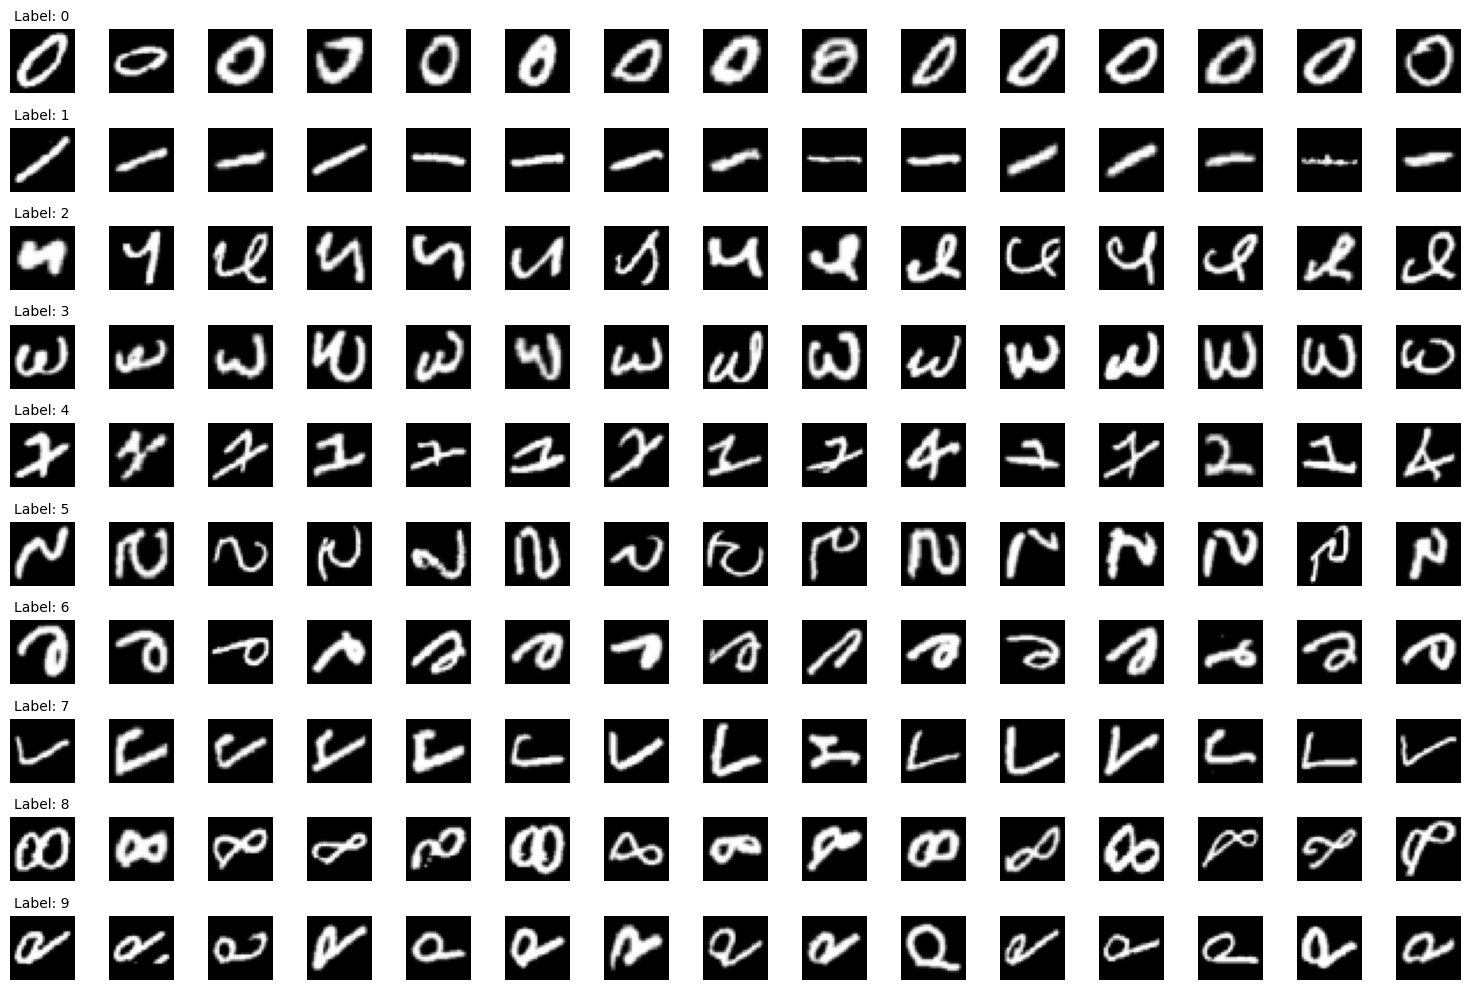

In [ ]:
train_labels = np.argmax(y_train, axis=1)
unique_labels = np.unique(train_labels)

fig, axes = plt.subplots(nrows=len(unique_labels), ncols=15, figsize=(15, 1 * len(unique_labels)))

for i, label in enumerate(unique_labels):
    idxs = np.where(train_labels == label)[0][:15]
    for j, idx in enumerate(idxs):
        axes[i, j].imshow(X_train[idx].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(f"Label: {label}", fontsize=10)

plt.tight_layout()
plt.show()

# Modeling

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_val, y_val)
)


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.5542 - loss: 1.3993 - val_accuracy: 0.9320 - val_loss: 0.2361
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - accuracy: 0.9090 - loss: 0.3084 - val_accuracy: 0.9600 - val_loss: 0.1461
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9492 - loss: 0.1746 - val_accuracy: 0.9750 - val_loss: 0.1037
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9606 - loss: 0.1394 - val_accuracy: 0.9800 - val_loss: 0.0883
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9659 - loss: 0.1102 - val_accuracy: 0.9850 - val_loss: 0.0756
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9716 - loss: 0.0987 - val_accuracy: 0.9750 - val_loss: 0.0787
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9749 - loss: 0.0828 - val_accuracy: 0.9780 - val_loss: 0.0816
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9782 - loss: 0.0757 - val_accuracy: 0.9780 -

# Evaluation

In [ ]:
# Menampilkan akurasi training (nilai pada epoch terakhir)
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print("Training Accuracy (epoch terakhir):", final_train_acc)
print("Validation Accuracy (epoch terakhir):", final_val_acc)

# Evaluasi model pada test set dan tampilkan akurasi test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Training Accuracy (epoch terakhir): 0.9905555844306946
Validation Accuracy (epoch terakhir): 0.9850000143051147
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9888 - loss: 0.0517
Test Accuracy: 0.9837999939918518


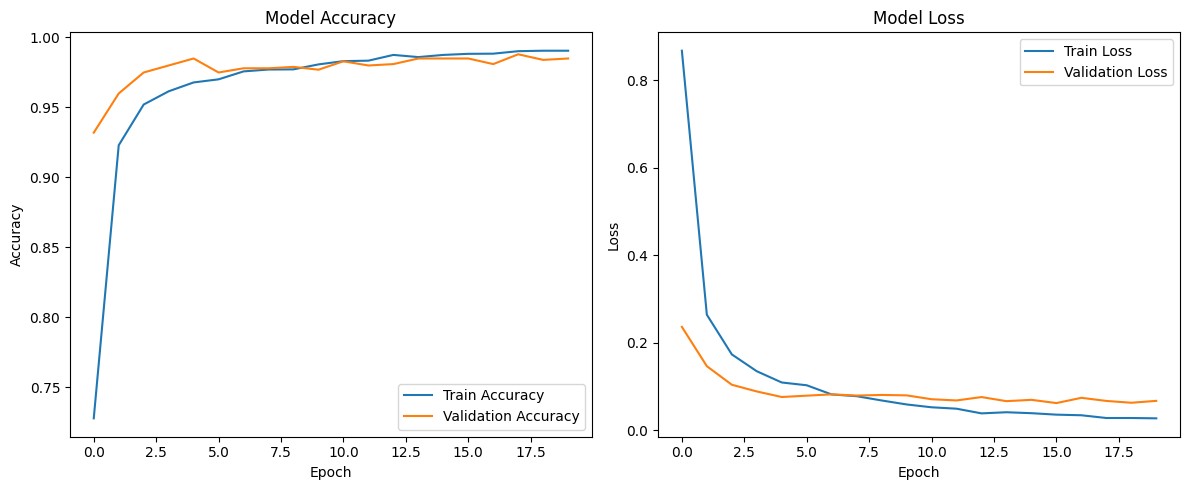

In [ ]:
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save Model

## SavedModel

In [ ]:
model.export('submission/saved_model')

INFO:tensorflow:Assets written to: submission/saved_model/assets


INFO:tensorflow:Assets written to: submission/saved_model/assets


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  5735427840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735428896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735428192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735427664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735429424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735428016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735428720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5735429952: TensorSpec(shape=(), dtype=tf.resource, name=None)


## TF-Lite

In [ ]:
import tensorflow as tf

# Konversi dari folder SavedModel ke TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model('submission/saved_model')
tflite_model = converter.convert()

# Pastikan folder 'tflite' sudah ada; jika belum, buat folder tersebut
import os
if not os.path.exists('submission/tflite'):
    os.makedirs('submission/tflite')

# Simpan file TF-Lite
with open('submission/tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

# (Opsional) Simpan file label jika diperlukan
with open('submission/tflite/label.txt', 'w') as f:
    for i in range(num_classes):
        f.write(f"{i}\n")

W0000 00:00:1742790897.409364 1427901 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1742790897.409385 1427901 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-03-24 11:34:57.409906: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: submission/saved_model
2025-03-24 11:34:57.412347: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-03-24 11:34:57.412373: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: submission/saved_model
2025-03-24 11:34:57.444827: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-03-24 11:34:57.542623: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: submission/saved_model
2025-03-24 11:34:57.576191: I tensorflow/cc/saved_model/loader.cc:317] SavedModel load for tags { serve }; Status: success: OK. Took 166287 microseconds.


## TFJS

In [ ]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.22.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached flax-0.10.4-py3-none-any.whl.metadata (11 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp311-cp311-macosx_10_14_x86_64.whl.metadata (1.0 kB)
  Using cached tensorflow_decision_forests-1.9.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata (6.0 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached msgpack-1.1.0-cp311-cp311-macosx_10_9_x86_64.whl.metadata (8.4 kB)
  Using cached optax-0.2.4-py3-none-any.whl.metadata (8.3 kB)
  Using cached orbax_checkpoint-0.11.10-py3-none-any.whl.metadata (2.0 kB)
  Using cached tensorstore-0.1.72-cp311-cp311-macosx_10_14_x86_64.whl.metadata (21 kB)
  Using cached treescope-0.1.9-py3-none-any.whl.metadata (6.6 kB)
INFO: pip is looking at multiple ve

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model tfjs_model

zsh:1: command not found: tensorflowjs_converter


# Inference Model